# Assignment 2

Use this notebook to write your code for assignment 2

# Pre-processing data

Read the data file of `shakespeare.txt` and prepare the inputs/outputs to your model.

In [1]:
import math
import string
import random
import re
import time


import torch
import torch.nn as nn
from torch.autograd import Variable

import unidecode
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
all_characters = string.printable # list of all possible characters (from string)
num_characters = len(all_characters) # number of possible characters

text = unidecode.unidecode(open('./data/shakespeare.txt').read())

text_len = len(text) 

sequence_len = 40

def generate_sequence():
    start_index = random.randint(0, text_len - sequence_len)
    end_index = start_index + sequence_len + 1
    return text[start_index:end_index]


# Build the Model

Implement a character-based LSTM model 

In [3]:
class DeepPoet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(DeepPoet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers
        
        self.encoder = nn.Embedding(input_size, hidden_size)
        
        self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers)
        
        self.decoder = nn.Linear(hidden_size, output_size)
    
    def forward(self, input, hidden):
        input = self.encoder(input.view(1, -1))
        output, hidden = self.lstm(input.view(1, 1, -1), hidden)
        output = self.decoder(output.view(1, -1))
        return output, hidden

    def init_hidden(self): 
        return (torch.zeros(1, 1, self.hidden_size),
                torch.zeros(1, 1, self.hidden_size))

In [4]:
def char_tensor(string):
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        tensor[c] = all_characters.index(string[c])
    return Variable(tensor)


# Training

The main training routine

In [5]:
def generate_training_set():    
    sequence = generate_sequence()
    inp = char_tensor(sequence[:-1])
    target = char_tensor(sequence[1:])
    return inp, target

In [6]:

def evaluate_DeepPoet(character_seed='A', predict_len=100, temperature=0.8):
    
    hidden = decoder.init_hidden()
    seed_input = char_tensor(character_seed)
    predicted_string = character_seed

    for p in range(len(character_seed) - 1):
        _, hidden = decoder(seed_input[p], hidden)
    inp = seed_input[-1]
    
    for p in range(predict_len):
        output, hidden = decoder(inp, hidden)
        output_distribution = output.data.view(-1).div(temperature).exp()
        top_character = torch.multinomial(output_distribution, 1)[0]
        predicted_char = all_characters[top_character]
        predicted_string += predicted_char 
        inp = char_tensor(predicted_char) 
        
    return predicted_string

In [7]:

def train(inp, target):
    hidden = decoder.init_hidden()
    decoder.zero_grad()

    loss = 0

    for c in range(sequence_len):
        output, hidden = decoder(inp[c], hidden)
        loss += criterion(output, torch.LongTensor([target[c]]))

    loss.backward()
    decoder_optimizer.step()

    return loss.data.item() / sequence_len

In [8]:
def runtime(instant):
    seconds = time.time() - instant
    minutes= math.floor(seconds / 60)
    seconds -= minutes * 60
    return '%dm %ds' % (minutes, seconds)

In [9]:
num_epochs = 3000
print_every = 500 
plot_every = 10 
hidden_size = 200
num_layers = 1
learning_rate = 0.005

decoder = DeepPoet(num_characters, hidden_size, num_characters, num_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

start = time.time()
all_losses = [] 
loss_avg = 0

for epoch in range(1, num_epochs + 1):
    loss = train(*generate_training_set())       
    loss_avg += loss

    if epoch % print_every == 0:
        print('[Runtime: %s, Epoch: %d (%d%%), Loss: %.4f]' % (runtime(start), epoch, epoch / num_epochs * 100, loss))
        print(evaluate_DeepPoet('As', 100), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every) 
        loss_avg = 0

[Runtime: 0m 19s, Epoch: 500 (16%), Loss: 2.0236]
As.

           But beal nound:
And hald not beappy of fall cownstes of the ind,
And thante hinst the, 

[Runtime: 0m 39s, Epoch: 1000 (33%), Loss: 2.1422]
As do gile thou do there it on thou walt:
O hasto watth do thou in do hands worrveress the mest that u 

[Runtime: 0m 58s, Epoch: 1500 (50%), Loss: 1.9029]
As to my nage, not heepose,
Those,
Whe doth the to nore will love,
And cold, me of summate sore on lov 

[Runtime: 1m 18s, Epoch: 2000 (66%), Loss: 1.9386]
As what my uph's it an my is pladst or of thou are,
That thou are, whold my the bears made praing the  

[Runtime: 1m 38s, Epoch: 2500 (83%), Loss: 1.9843]
As so thou firth is they have parting yet seeme, remion I rom and thee,
  The ming;
Doth truth nered i 

[Runtime: 1m 57s, Epoch: 3000 (100%), Loss: 1.6484]
As frife thy skill ofirned all, still,
  As this not convist still,
  But their in thy shalthere in gn 



# Plotting the Training Losses

Plotting the historical loss during training:

Text(0, 0.5, 'Loss')

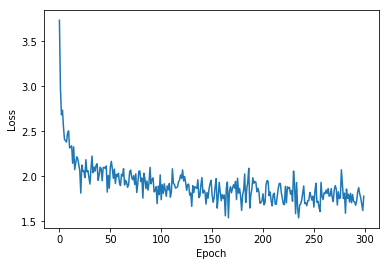

In [10]:
# Plot Loss function using "all_losses"

plt.figure()
plt.plot(all_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')


# Evaluating at different "temperatures"

Changing the `temperature` argument (variance) for 1.5, 0.75. 0.25 and sample outputs from the trained model.


References:
* [Shakespeare Sonnets](http://shakespeare.mit.edu/Poetry/sonnets.html)

In [11]:
print(evaluate_DeepPoet('As fast as thou shalt wane, so fast thou growest\n', 300, temperature=1.5))

As fast as thou shalt wane, so fast thou growest
As mavine thet n, whste to peirp, cr! yllieverth in weay hadmist erpy sum this vill.
  O morath '$on thou tom thyedciveouaten my foorr-so, hathk ste of you, birs arge,
Dors .aikeday penf:
A 13eks rhupace atattacwlus,
If mick lfen it stt gone po, pn pridgueed?
ey oowicl, lebfeant eserp oll besog,
  


In [12]:
print(evaluate_DeepPoet('As fast as thou shalt wane, so fast thou growest\n', 300, temperature=0.75))

As fast as thou shalt wane, so fast thou growest
Whis shad it bared) bring and to shall I my ust chink crust (I say thou stust than alove nance oner,
The love with those herverein self not in my this the hathy prove in the such shall, and alove from a cis dear,
When doth then thy with bey still, oth as are ain?
When the thalt, at resscain.
  Thous


In [13]:
print(evaluate_DeepPoet('As fast as thou shalt wane, so fast thou growest\n', 300, temperature=0.25))

As fast as thou shalt wane, so fast thou growest
The fire the fill,
  And thou still,
And that shall,
  And all shall thou still,
  And that all all the shall the shall the from shall the shall the hath the with the find, and still,
  The the self the live is from the love the the fill,
And that the such the live the my still,
  And the he from th
